---

## Survival Analysis for Predicting In-Hospital Mortality in ICU Patients
This notebook is dedicated to performing survival analysis on data from the PhysioNet Challenge, specifically focusing on predicting in-hospital mortality risk for patients in Intensive Care Units (ICU). Our approach involves using the Kaplan-Meier estimator, a non-parametric statistic used to estimate the survival function from lifetime data, particularly suitable for handling censored data commonly encountered in healthcare settings

### Approach
We will utilize the Kaplan-Meier method to estimate survival probabilities over time for ICU patients. This method is particularly advantageous in medical research for its ability to handle censored data and provide a visual understanding of survival probabilities over time

### Steps
1. **Dataset Overview**: Introduction to the dataset and key variables for survival analysis
2. **Data Preprocessing**: Preparing the dataset for Kaplan-Meier analysis, including handling of censored data
3. **Kaplan-Meier Estimation**: Understanding and implementing the Kaplan-Meier method to estimate survival probabilities
4. **Survival Curve Plotting**: Visualizing the survival curve to interpret how survival probabilities change over time
5. **Result Interpretation**: Discussing the implications of the survival curve in the context of in-hospital mortality in ICU settings
6. **Additional Analysis**: Exploring further topics in survival analysis such as comparing different patient groups or incorporating additional variables into the analysis

#### The goal of this analysis is not only to estimate in-hospital mortality risk but also to provide a deeper understanding of survival probabilities over time for ICU patients, which is crucial for medical decision-making and patient care planning

---

## 0. Data Ingestion
We will be using the [PhysioNet Challenge 2012 dataset](https://physionet.org/content/challenge-2012/1.0.0/), which contains data from 4000 ICU patients. The dataset is provided in the form of a CSV file, which we will read into a Pandas DataFrame for further analysis.

In [36]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import seaborn as sns



In [38]:
ICU_df = pd.read_csv('PhysionetChallenge2012-set-a.csv.gz', compression='gzip')

In [12]:
ICU_df.shape

(4000, 120)

## 1. Dataset Overview: Introduction to the dataset and key variables for survival analysis
We'll be focusing on the following variables for our survival analysis: Survival time, in-hospital mortality, and length of stay in the ICU.

In [13]:
ICU_df[['Survival', 'Length_of_stay', 'In-hospital_death']].sample(10)

,Survival,Length_of_stay,In-hospital_death
2120,-1,12,0
3290,-1,9,0
2521,-1,11,0
3389,700,29,0
1553,-1,15,0
1470,65,38,0
3614,-1,3,0
2518,-1,5,0
2026,2,3,1
2420,776,8,0


Refer to [PhysioNet Challenge 2012 dataset](https://physionet.org/content/challenge-2012/1.0.0/) for information on the intepretatin of these two columns i.e.

1. **Length of Stay**: How long a patient stayed in the hospital from the time they were admitted to the ICU, includes any time spent in the hospital even after leaving the ICU until they:
    - a) left the hospital
    - b) passed away
2. **Survival**: The number represents how many days a patient lived after being admitted to the ICU. 
    - If a patient died (whether in the hospital or after leaving), "Survival" shows the number of days from ICU admission to their death
    - If a patient did not die, or if there's no record of their death, "Survival" is given a value of -1
3. **In-hospital Mortality**: Whether a patient died in the hospital (1) or not (0). 
    - Serves as the "event indicator", in this case, is death in the hospital.
    - The Kaplan-Meier estimator uses this information to calculate the probability of survival over time, considering both patients who experienced the event (death) and those who did not
    - This is crucial for interpreting the survival curves accurately

Hence:
- If "Survival" is greater than "Length of Stay", it means the patient survived and left the hospital.
- If "Survival" equals -1, it also means the patient survived (but we don't know for how long).
- If "Survival" is between 2 and the "Length of Stay" (inclusive), it means the patient died in the hospital.

## 2. Data Preprocessing: Preparing the dataset for Kaplan-Meier analysis, including handling of censored data

We'll now:
1. Handle Censored Data: In the dataset, a 'Survival' value of -1 indicates the patient survived (censored data)
2. Use 'In-hospital_death' as the event indicator, with death as the event of interest
3. Filter Data: Exclude records that are not relevant or incorrectly formatted for survival analysis

In [39]:
# 1. Handle Censored Data
# Convert 'Survival' values of -1 to a large number to indicate survival (censoring)
max_survival = ICU_df['Survival'].max()
ICU_df['Survival'] = ICU_df['Survival'].replace(-1, max_survival + 1)

ICU_df[['Survival', 'Length_of_stay', 'In-hospital_death']].head()


,Survival,Length_of_stay,In-hospital_death
0,2601,5,0
1,2601,8,0
2,2601,19,0
3,575,9,0
4,918,4,0


# 3. Kaplan-Meier Estimation
Implementing the Kaplan-Meier method to estimate survival probabilities over time for the ICU patients

In [40]:
# Creating the Kaplan-Meier object
kmf = KaplanMeierFitter()

# Fitting the data into the model
kmf.fit(durations=ICU_df['Survival'], event_observed=ICU_df['In-hospital_death'])

# Displaying the survival function
kmf.survival_function_


,KM_estimate
timeline,
0.0,1.000000
1.0,0.993495
2.0,0.979485
3.0,0.966722
4.0,0.957710
...,...
2386.0,0.860486
2408.0,0.860486
2550.0,0.860486


## 4. Survival Curve Plotting: Visualizing the survival curve to interpret how survival probabilities change over time

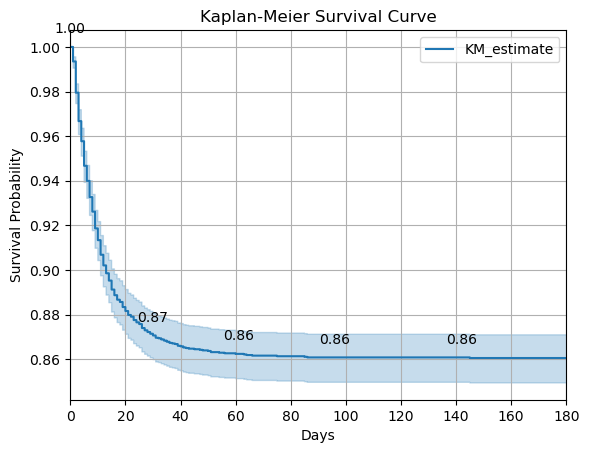

In [27]:
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Days')
plt.ylabel('Survival Probability')

# Add gridlines
plt.grid(True)

# Zoom in on the first 180 days to see more detail
plt.xlim(0, 180)

# Annotate specific points
for i in range(0, 180, 30):  # Annotate every 30 days
    plt.annotate(f"{kmf.survival_function_.iloc[i, 0]:.2f}",
                 (kmf.survival_function_.index[i], kmf.survival_function_.iloc[i, 0]),
                 textcoords="offset points",  # how to position the text
                 xytext=(0,10),  # distance from text to points (x,y)
                 ha='center')  # horizontal alignment can be left, right or center

plt.show()


## 5. Result Interpretation: Discussing the implications of the survival curve in the context of in-hospital mortality in ICU settings
Interpreingt the Kaplan-Meier survival plot and understand what it indicates about the patient cohort

1. **Early Decline**: What factors might contribute to early mortality in ICU patients e.g. severity of illness, emergency admissions
2. **Plateau Phase**: What factors may help explaining the plateau in the survival curve? e.g. patients with better long-term prognosis
3. **Long-term Survivors**: What does it indicate when the survival probability becomes flat? e.g. patients who survived for a long duration
4. **Censoring**: What's the impact of censored data on the survival estimates, especially towards the end of the study period?
5. **Clinical Implications**: **SO WHAT!?** How these survival probabilities can inform clinical practice, patient counseling, and healthcare policy

## 6. Additional Analysis: Exploring further topics in survival analysis e.g. different patient groups

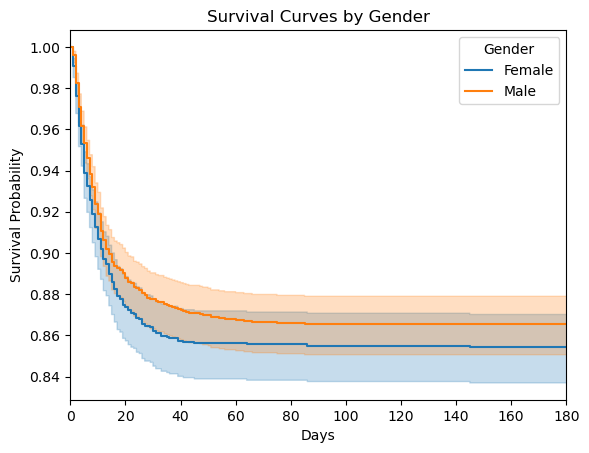

In [34]:
# ... previous code for fitting the model ...

# Plot the survival curves for each gender on the same graph and set the legend labels
ax = plt.subplot(111)

# Zoom in on the first 180 days to see more detail
plt.xlim(0, 180)

for gender in genders:
    # Selecting data for the specific gender
    data = ICU_df[ICU_df['Gender'] == gender]

    # Check if the group has data
    if not data.empty:
        # Fit the Kaplan-Meier model
        kmf.fit(durations=data['Survival'], event_observed=data['In-hospital_death'])

        # Plot the survival curve with a custom label
        kmf.plot_survival_function(ax=ax, label=('Female' if gender == 0 else 'Male'))

# Enhance the plot with a title and labels
ax.set_title('Survival Curves by Gender')
ax.set_xlabel('Days')
ax.set_ylabel('Survival Probability')

# Correct the legend
ax.legend(title='Gender')
plt.show()


c:\Users\idiazl01\AppData\Local\miniconda3\envs\ICU_predict\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idiazl01\AppData\Local\miniconda3\envs\ICU_predict\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


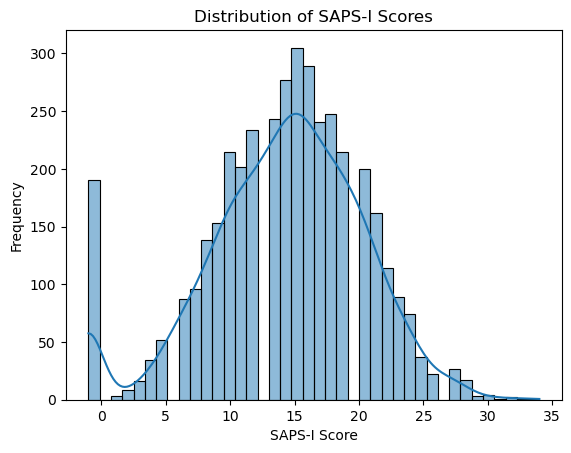

In [41]:
# Visualize the distribution of SAPS-I scores to determine cutoffs for "Low", "Medium", and "High"
sns.histplot(ICU_df['SAPS-I'], kde=True)
plt.title('Distribution of SAPS-I Scores')
plt.xlabel('SAPS-I Score')
plt.ylabel('Frequency')
plt.show()


In [42]:
# Calculate the mean and standard deviation of the SAPS-I scores
saps_mean = ICU_df['SAPS-I'].mean()
saps_std = ICU_df['SAPS-I'].std()

# Define cutoffs using standard deviations from the mean
low_saps_cutoff = saps_mean - saps_std
high_saps_cutoff = saps_mean + saps_std

# Categorize the SAPS-I scores using these cutoffs
ICU_df['SAPS-I_Category'] = pd.cut(ICU_df['SAPS-I'], 
                                    bins=[ICU_df['SAPS-I'].min(), low_saps_cutoff, high_saps_cutoff, ICU_df['SAPS-I'].max()],
                                    labels=['Low', 'Medium', 'High'], 
                                    right=False)

# Output the cutoffs and a few rows of the dataframe to verify the categorization
low_saps_cutoff, high_saps_cutoff, ICU_df[['SAPS-I', 'SAPS-I_Category']].head()


(8.11491597217662,
 20.29208402782338,
    SAPS-I SAPS-I_Category
 0       6             Low
 1      16          Medium
 2      21            High
 3       7             Low
 4      17          Medium)

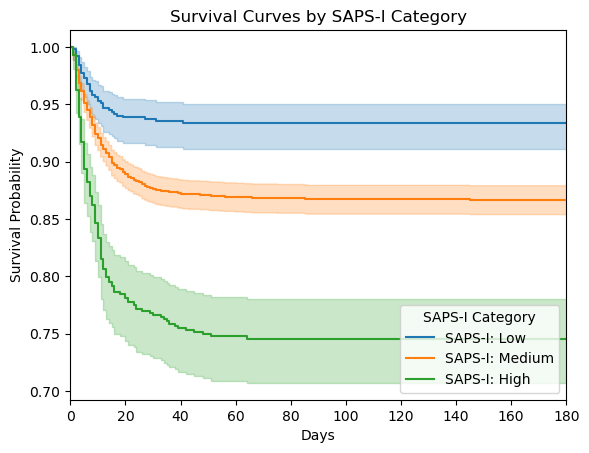

In [44]:
# Plot survival curves for each SAPS-I category
for category in ['Low', 'Medium', 'High']:
    # Selecting data for the specific category
    data = ICU_df[ICU_df['SAPS-I_Category'] == category]

    # Fit the Kaplan-Meier model
    kmf.fit(durations=data['Survival'], event_observed=data['In-hospital_death'], label=f'SAPS-I: {category}')

    # Plot the survival curve
    kmf.plot_survival_function()

# Zoom in on the first 180 days to see more detail
plt.xlim(0, 180)
# Enhance the plot
plt.title('Survival Curves by SAPS-I Category')
plt.xlabel('Days')
plt.ylabel('Survival Probability')
plt.legend(title='SAPS-I Category')
plt.show()


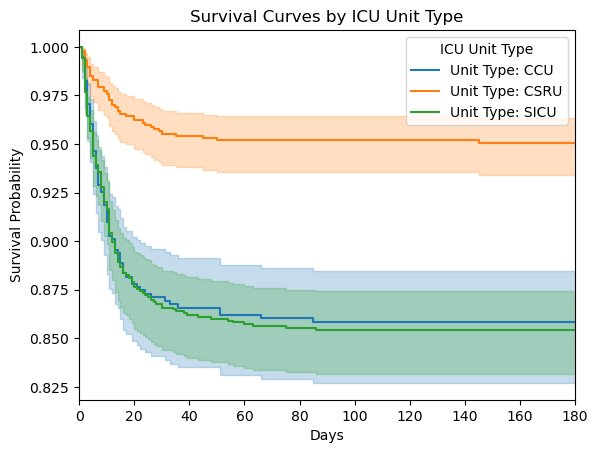

In [46]:
# Define unit types
unit_types = ['CCU', 'CSRU', 'SICU']

# CCU (Critical Care Unit)
# CSRU (Cardiac Surgery Recovery Unit)
# SICU (Surgical Intensive Care Unit)

# Plot survival curves for each unit type
for unit in unit_types:
    # Selecting data for the specific unit
    data = ICU_df[ICU_df[unit] == 1]  # Assuming a 1 indicates admission to the unit

    # Fit the Kaplan-Meier model
    kmf.fit(durations=data['Survival'], event_observed=data['In-hospital_death'], label=f'Unit Type: {unit}')

    # Plot the survival curve
    kmf.plot_survival_function()

# Zoom in on the first 180 days to see more detail
plt.xlim(0, 180)
# Enhance the plot
plt.title('Survival Curves by ICU Unit Type')
plt.xlabel('Days')
plt.ylabel('Survival Probability')
plt.legend(title='ICU Unit Type')
plt.show()
